In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_novo = pd.read_excel('../dados_finais_2024/final_data.xlsx')
df_antigo = pd.read_excel('../data/final_data_original.xlsx')

In [41]:
df_novo

,ID Resultado,ID Competidor,Nome Competidor,ID Competição,Classe Vela,Pontuação Regata,Descarte,Flotilha,Posição Geral,Punição,Pontuação Total,Nett,Nome Competição
0,1,1,"WILLIAM JONES, EVAN DEPAUL",62,49ER,11,1,GERAL,1,UFD,44.0,33.0,World Championship 2017
1,2,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",49,49ER,3,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
2,3,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",49,49ER,1,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
3,4,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",49,49ER,1,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
4,5,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",49,49ER,3,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158141,158142,4689,TOBIAS NIGGL,59,ILCA 7,29,1,GERAL,28,DNF,158.0,129.0,Troféu Königswinkel ILCA 2023
158142,158143,4689,TOBIAS NIGGL,59,ILCA 7,26,0,GERAL,28,NaN,158.0,129.0,Troféu Königswinkel ILCA 2023
158143,158144,4689,TOBIAS NIGGL,59,ILCA 7,25,0,GERAL,28,NaN,158.0,129.0,Troféu Königswinkel ILCA 2023
158144,158145,4689,TOBIAS NIGGL,59,ILCA 7,26,0,GERAL,28,NaN,158.0,129.0,Troféu Königswinkel ILCA 2023


In [4]:
df_antigo = df_antigo.drop(columns=['Unnamed: 0'])

In [5]:
df_novo['Classe Vela'].value_counts()

ILCA 7                39646
ILCA 6                29721
49ER                  25989
49ERFX                16872
IQFOIL MASC.          13782
IQFOIL FEM.           10546
FORMULA KITE MASC.     7734
470                    5401
FORMULA KITE FEM.      4228
NACRA 17               3661
KITE                    276
IQFOIL 9                150
IQFOIL 8                140
Name: Classe Vela, dtype: int64

In [6]:
df_antigo['Classe Vela'] = df_antigo['Classe Vela'].map(lambda x: x.upper())

In [7]:
df_antigo['Classe Vela'] = df_antigo['Classe Vela'].replace('470.0','470')

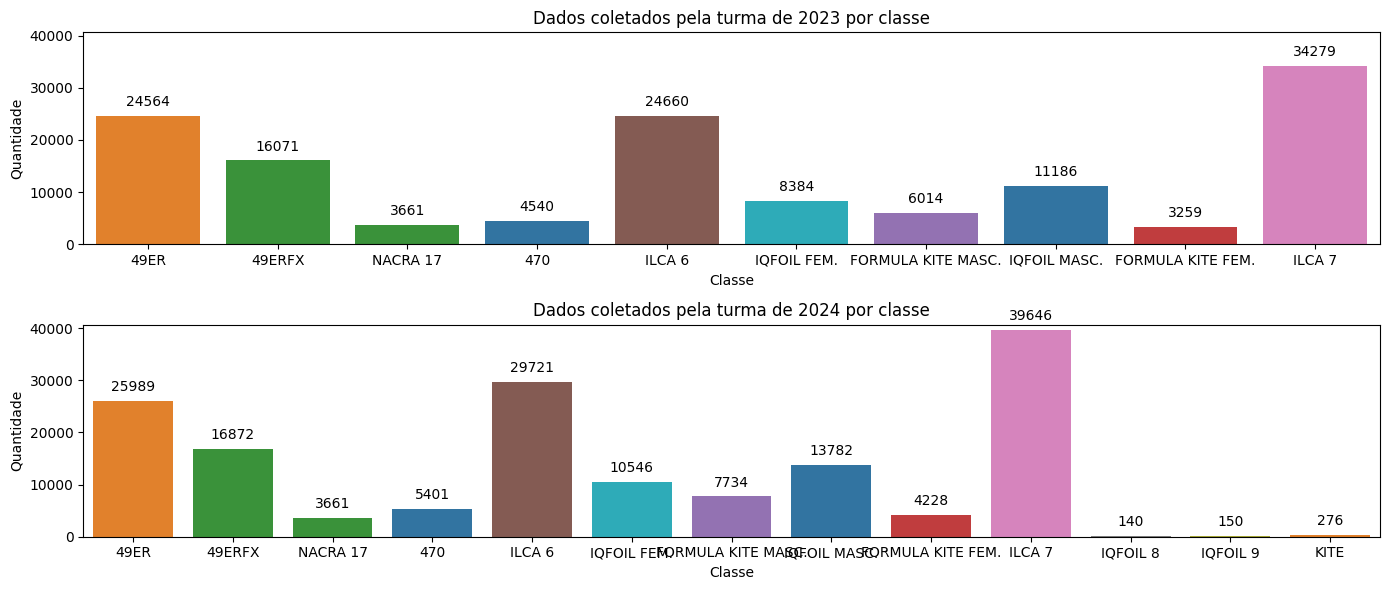

In [8]:
# plot quantidade de dados de cada df

fig, ax = plt.subplots(2, 1, figsize=(14, 6))

# Cria um dicionário de cores com base nas classes únicas de ambos os dataframes
classes_unicas = np.unique(np.concatenate((df_antigo['Classe Vela'].unique(), df_novo['Classe Vela'].unique())))
palette = dict(zip(classes_unicas, sns.color_palette(n_colors=len(classes_unicas))))

# Plota o primeiro gráfico de barras e adiciona os valores acima das barras
sns.countplot(data=df_antigo, x='Classe Vela', ax=ax[0], palette=palette)
ax[0].set_title('Dados coletados pela turma de 2023 por classe')
ax[0].set_xlabel('Classe')
ax[0].set_ylabel('Quantidade')
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

# Plota o segundo gráfico de barras e adiciona os valores acima das barras
sns.countplot(data=df_novo, x='Classe Vela', ax=ax[1], palette=palette)
ax[1].set_title('Dados coletados pela turma de 2024 por classe')
ax[1].set_xlabel('Classe')
ax[1].set_ylabel('Quantidade')
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

# Calcula o limite máximo de y com base nos dados de ambos os dataframes
ymax = max(df_antigo['Classe Vela'].value_counts().max(), df_novo['Classe Vela'].value_counts().max())

# Define o mesmo limite de y para ambos os subplots
ax[0].set_ylim([0, ymax+1000])
ax[1].set_ylim([0, ymax+1000])

plt.tight_layout()

plt.show()

<BarContainer object of 2 artists>

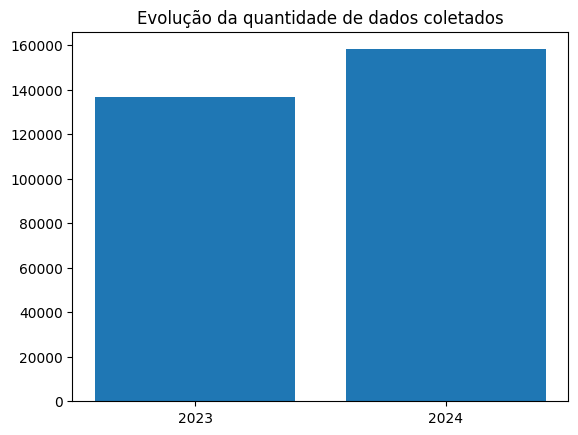

In [9]:
l1 = len(df_novo)
l0 = len(df_antigo)

# plot quantidade de dados de cada df

plt.title('Evolução da quantidade de dados coletados')
plt.bar(['2023', '2024'], [l0, l1])

In [10]:
df_novo['Nome Competição'].unique().shape

(69,)

In [11]:
df_antigo['Nome Competição'].unique().shape

(32,)

In [12]:
df_novo

,ID Resultado,ID Competidor,Nome Competidor,ID Competição,Classe Vela,Pontuação Regata,Descarte,Flotilha,Posição Geral,Punição,Pontuação Total,Nett,Nome Competição
0,1,1,"WILLIAM JONES, EVAN DEPAUL",62,49ER,11,1,GERAL,1,UFD,44.0,33.0,World Championship 2017
1,2,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",49,49ER,3,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
2,3,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",49,49ER,1,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
3,4,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",49,49ER,1,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
4,5,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",49,49ER,3,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158141,158142,4689,TOBIAS NIGGL,59,ILCA 7,29,1,GERAL,28,DNF,158.0,129.0,Troféu Königswinkel ILCA 2023
158142,158143,4689,TOBIAS NIGGL,59,ILCA 7,26,0,GERAL,28,NaN,158.0,129.0,Troféu Königswinkel ILCA 2023
158143,158144,4689,TOBIAS NIGGL,59,ILCA 7,25,0,GERAL,28,NaN,158.0,129.0,Troféu Königswinkel ILCA 2023
158144,158145,4689,TOBIAS NIGGL,59,ILCA 7,26,0,GERAL,28,NaN,158.0,129.0,Troféu Königswinkel ILCA 2023


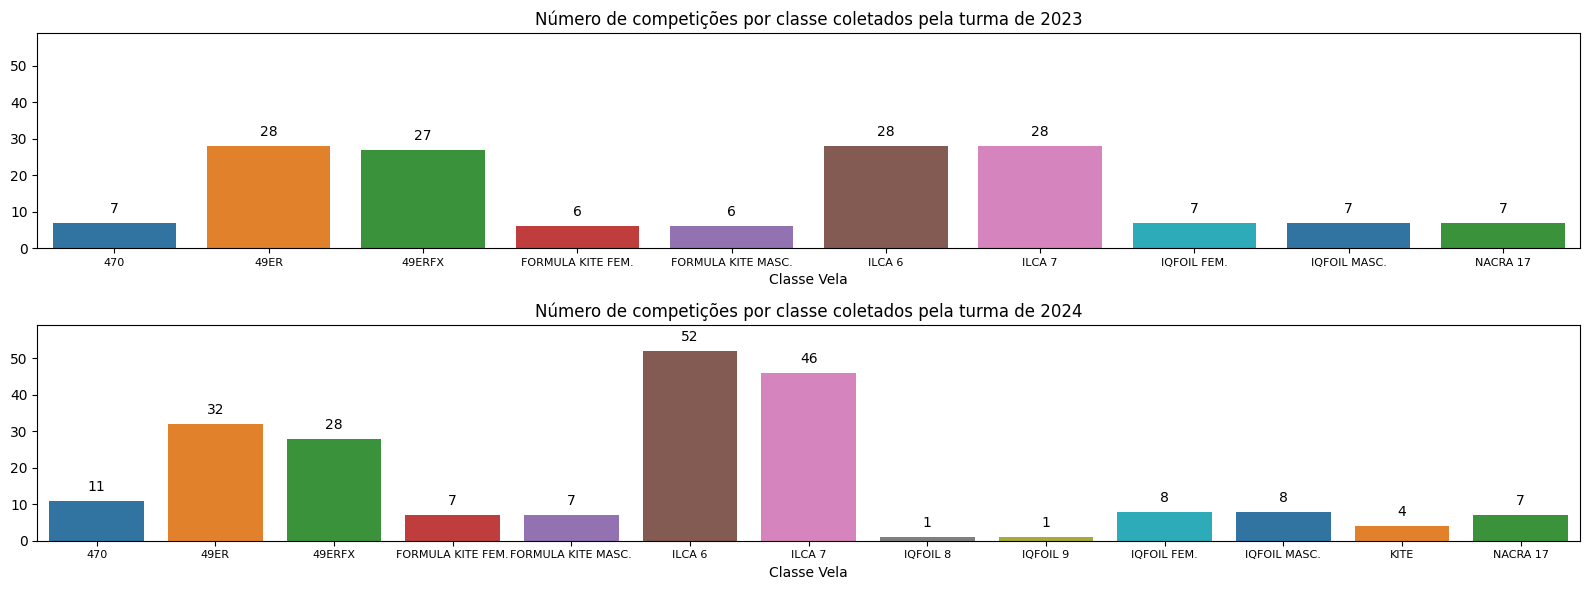

In [13]:
# plot o número de competições por classe coletados

comp_antigo = df_antigo.groupby('Classe Vela')['Nome Competição'].nunique()
comp_novo = df_novo.groupby('Classe Vela')['Nome Competição'].nunique()

classes_unicas = np.unique(np.concatenate((df_antigo['Classe Vela'].unique(), df_novo['Classe Vela'].unique())))
palette = dict(zip(classes_unicas, sns.color_palette(n_colors=len(classes_unicas))))

fig, ax = plt.subplots(2, 1, figsize=(16, 6))

# Plota o primeiro gráfico de barras e adiciona os valores acima das barras

sns.barplot(x=comp_antigo.index, y=comp_antigo.values, ax=ax[0], palette=palette)
ax[0].set_title('Número de competições por classe coletados pela turma de 2023')

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

# Plota o segundo gráfico de barras e adiciona os valores acima das barras

sns.barplot(x=comp_novo.index, y=comp_novo.values, ax=ax[1], palette=palette)

ax[1].set_title('Número de competições por classe coletados pela turma de 2024')

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

ymax = max(comp_antigo.max(), comp_novo.max())

ax[0].set_ylim([0, ymax+7])
ax[1].set_ylim([0, ymax+7])


ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)  # Adicione esta linha para o primeiro gráfico
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)  # Adicione esta linha para o segundo gráfico


plt.tight_layout()

plt.show()

In [14]:
# distribuição da quantidade de dados por classe

df_novo.groupby('Classe Vela')['Nome Competidor'].value_counts()

Classe Vela  Nome Competidor                      
470          LUISE WANSER, PHILIPP AUTENRIETH         91
             LARA VADLAU, LUKAS MAEHR                 90
             ANTON DAHLBERG, LOVISA KARLSSON          89
             THERES DAHNKE, MATTI CIPRA               85
             BEATRIZ GAGO, RODOLFO PIRES              84
                                                      ..
NACRA 17     SHIBUKI IITSUKA, WKAKO KAJIMOTO          12
             YU CHEN, QIANQIAN ZHOU                   12
             KWINTEN BORGHIJS, LIESELOTTE BORGHIJS    10
             LEONARD BEYER, ZOE COERS                 10
             THOMAS PROUST, ELOISE CLABON             10
Name: Nome Competidor, Length: 4446, dtype: int64

In [34]:
# Reorganizando os dados
data = df_novo.groupby('Classe Vela')['Nome Competidor'].value_counts().unstack()

data = data.T

data.columns

Index(['470', '49ER', '49ERFX', 'FORMULA KITE FEM.', 'FORMULA KITE MASC.',
       'ILCA 6', 'ILCA 7', 'IQFOIL 8', 'IQFOIL 9', 'IQFOIL FEM.',
       'IQFOIL MASC.', 'KITE', 'NACRA 17'],
      dtype='object', name='Classe Vela')

In [35]:
data.drop(columns=['IQFOIL 8','IQFOIL 9'], inplace=True)

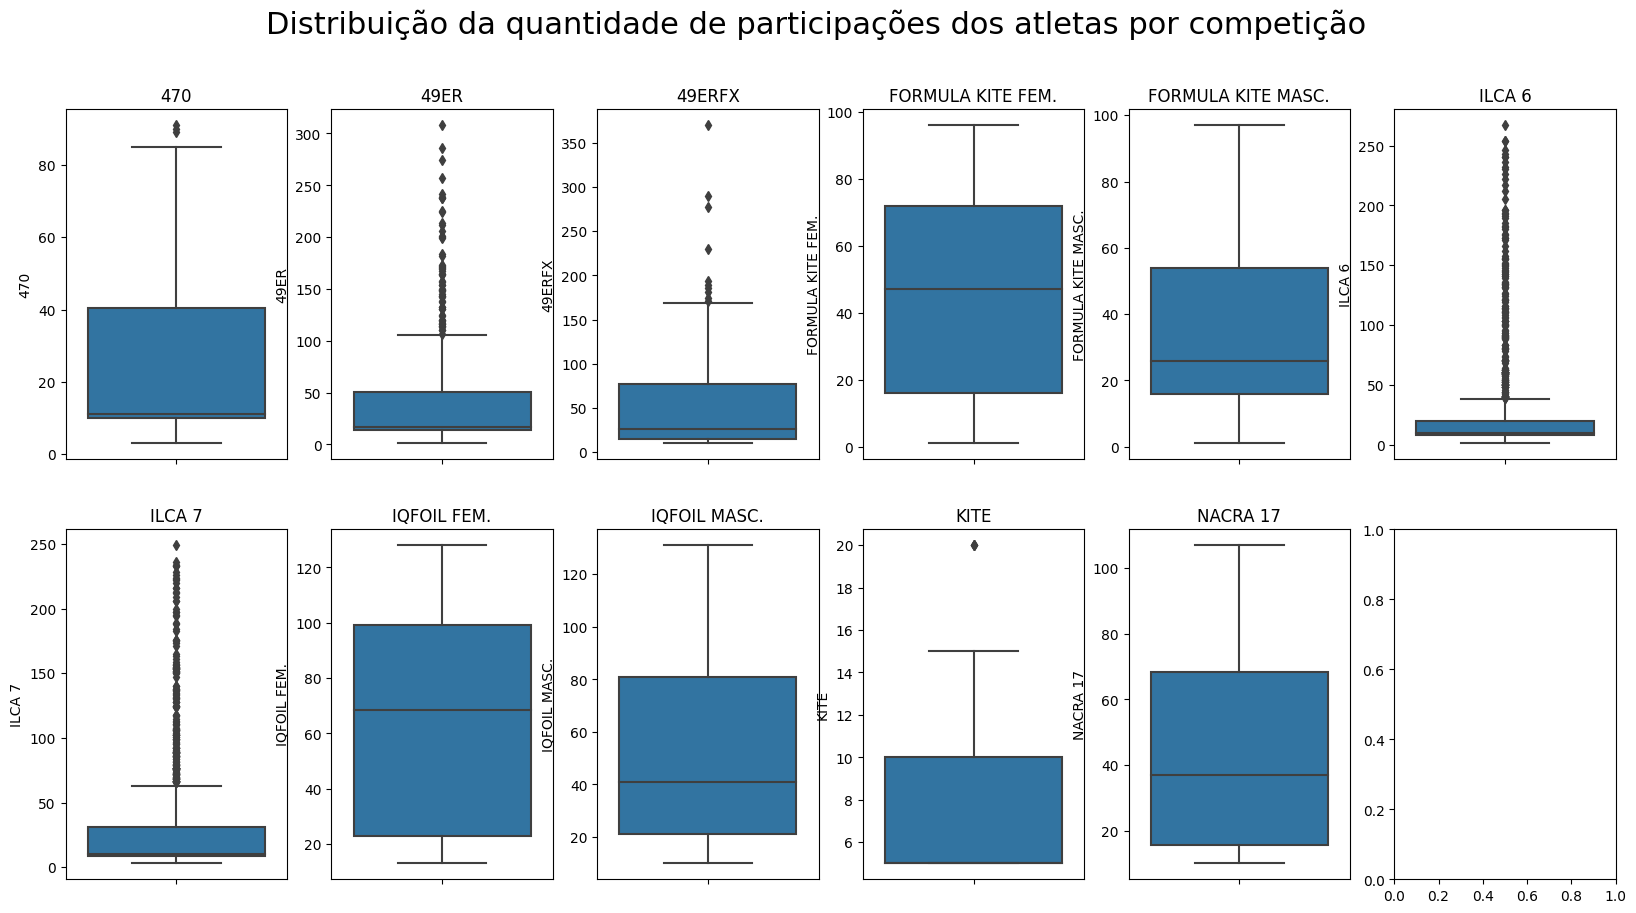

In [38]:
# plot a distribuição da quantidade de dados por classe
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(20, 10))

for i, col in enumerate(data.columns):
    sns.boxplot(y=data[col].dropna(), ax=axs[i//6, i%6])
    axs[i//6, i%6].set_title(col)

plt.suptitle('Distribuição da quantidade de participações dos atletas por competição', fontsize=22)

# plt.tight_layout()

plt.show()

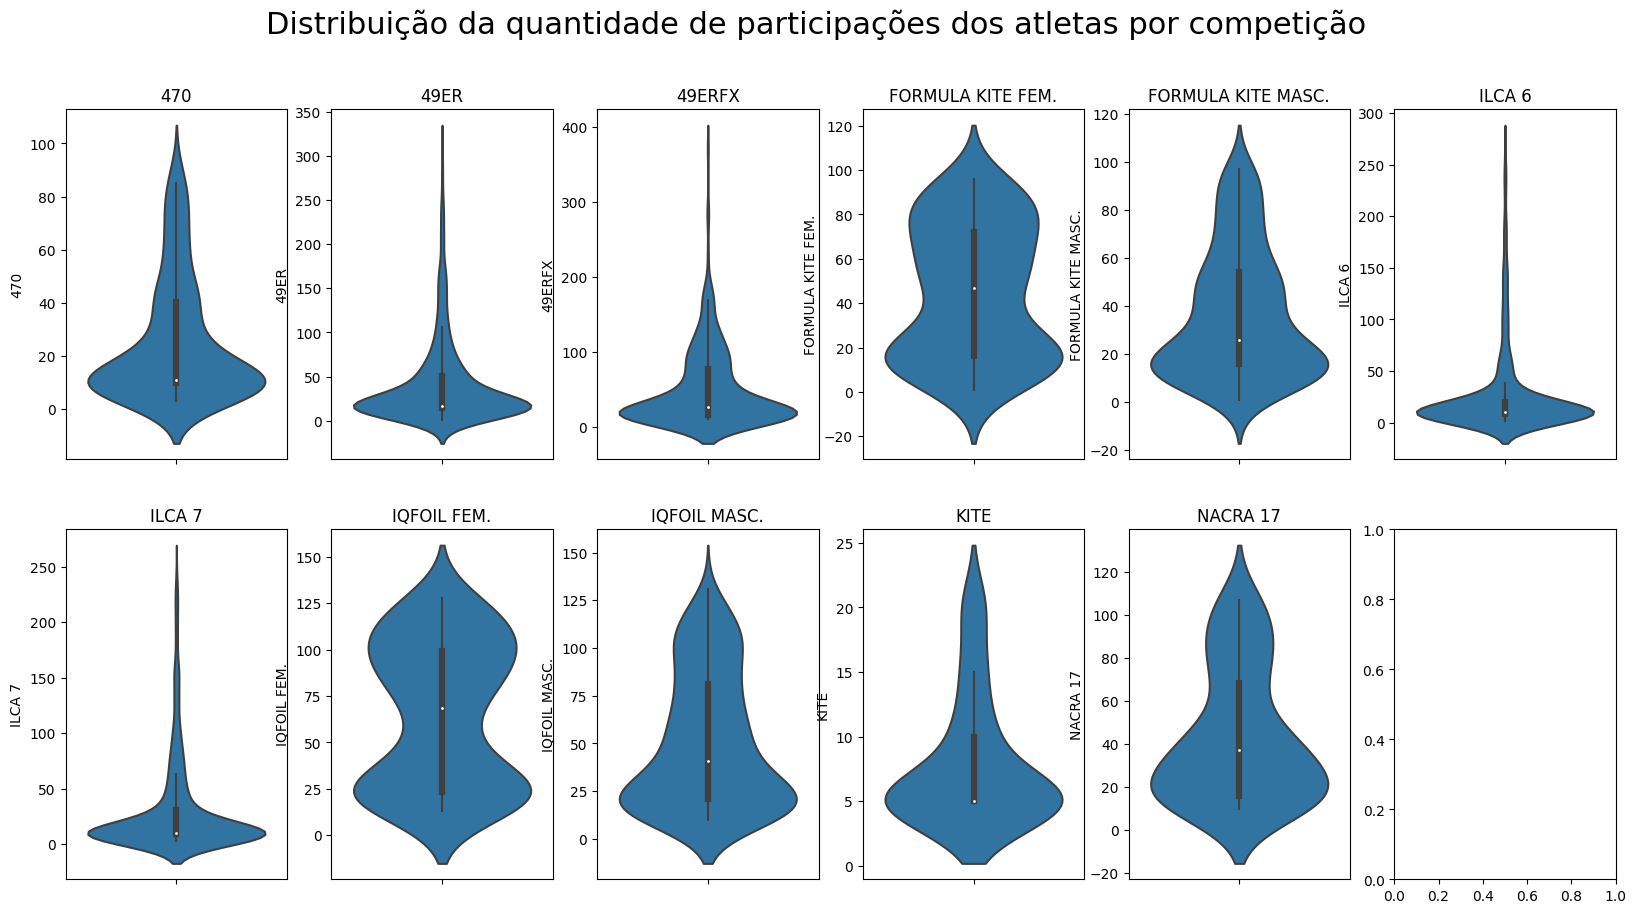

In [37]:
# plot a distribuição da quantidade de dados por classe
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(20, 10))

for i, col in enumerate(data.columns):
    sns.violinplot(y=data[col].dropna(), ax=axs[i//6, i%6])
    axs[i//6, i%6].set_title(col)

plt.suptitle('Distribuição da quantidade de participações dos atletas por competição', fontsize=22)

# plt.tight_layout()

plt.show()